<h1>Part 3b - Piece Classification: Train + Predict with Model Results</h1>

<h2>Piece_Classification Object</h2>

 A classifier for pieces in individual chess squares with a labeler, trainer and detector. Labeler is implemented in gcb_utils while trainer and detector are implemented in using a simply connected CNN in Tensorflow. Implementation is similar to a basic MNIST classification exercise.<br>

In [1]:
import gcb_utils.gcb_utils as gcb_utils
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from piece_classification import Piece_Classification
from PIL import Image
import seaborn as sns
import tensorflow as tf

<h2>Initialize the Model</h2>

Note that we're not specifying model weights, yet. It's an optional parameter at this point.

In [2]:
model_dir = 'data/model/piece-train/exp1'

piece_classifier = Piece_Classification(model_dir)

No model weight file specified. You can train a new model using Piece_Classification.train or create one using .create_model and then training it.


<h2>Update Labels - piece_classifier.update_labels()</h2>

Although demonstrated in Part 2b, I am including the update_labels() function of Piece_Classification here for completeness.      

In [5]:
#please uncomment the below for documentation
#print(help(piece_classifier.update_labels))

In [ ]:
main_source_dir = 'data/raw/squares'
labels_csv_full_path = 'data/model/sq_labels.csv'
SQ_LABEL_COLUMNS = ['fname', 'SqColor-BWE', 'PcColor-BWE', 'PcType-PRNBQKE','HumCheck-YN'] 
update_fn = gcb_utils.square_insert_default_values
update_fn_kwargs ={'label_cols':['SqColor-BWE', 'PcColor-BWE', 'PcType-PRNBQKE'], 'hum_check_col':['HumCheck-YN']}

piece_classifier.update_labels(main_source_dir, labels_csv_full_path, SQ_LABEL_COLUMNS, update_fn=update_fn, update_fn_kwargs=update_fn_kwargs)

<h2>Training-i: 40-Epoch Run in the Notebook</h2>

<li>The function .train() creates and compiles a classier with two convolutional neural network layers to a dense layer which is in turn connected to a dense output layer with softmax activation. Note that the function also takes kwargs tensforflow model's fit and compile functions as wells for some parameters in model architecture in self.create_model. Function saves the best model encountered - best is defined as lowest 'val_loss' for a run with a validation set and lowest 'loss' for a run with training set only. <br><br>

<li>Following is a 40-epoch training to demonstrate the test-validation accuracy. I will follow up with a confusion matrix for this multi-class classifier.

In [10]:
#please uncomment the below for documentation
#print(help(piece_classifier.train))
#print(help(piece_classifier.create_model))

In [11]:
    model_weight_fname = 'cnn_pieces.h5' 
    source_train = 'data/raw/squares/train'
    source_valid = 'data/raw/squares/validation'
    labels_csv_full_path = 'data/model/sq_labels.csv'
    label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
    fname_col = 'fname'
    label_cols = ['PcColor-BWE', 'PcType-PRNBQKE']
    square_size = 80
    image_size = [square_size, square_size]
    epochs = 40
    tf_fit_kwargs = {'verbose':2}

    print('Initialize with file')
    piece_classifier = Piece_Classification(model_dir)
    
    piece_classifier.train(source_train, 
                           labels_csv_full_path, fname_col, label_cols, 
                           label_dict_csv_full_path, 
                           image_size, 
                           model_dir, model_weight_fname, 
                           epochs=epochs, 
                           test_data_dir=source_valid)

Initialize with file
No model weight file specified. You can train a new model using Piece_Classification.train or create one using .create_model and then training it.
All image Count:5696
Data Dir Count:4231
Final Count to Process:4231
All image Count:5696
Data Dir Count:1128
Final Count to Process:1128


2021-12-17 21:55:31.568499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-17 21:55:31.568574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-17 21:55:31.653929: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
(None, 6400)
Epoch 1/40
  3/133 [..............................] - ETA: 4s - loss: 148.9516 - accuracy: 0.2188 

2021-12-17 21:55:31.784465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


132/133 [============================>.] - ETA: 0s - loss: 6.1916 - accuracy: 0.6750

2021-12-17 21:55:36.418317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_loss improved from inf to 1.09348, saving model to data/model/piece-train/exp1/cnn_pieces.h5
133/133 [==============================] - 5s 38ms/step - loss: 6.1832 - accuracy: 0.6750 - val_loss: 1.0935 - val_accuracy: 0.7385
Epoch 2/40
132/133 [============================>.] - ETA: 0s - loss: 0.8040 - accuracy: 0.8175
Epoch 00002: val_loss improved from 1.09348 to 0.24252, saving model to data/model/piece-train/exp1/cnn_pieces.h5
133/133 [==============================] - 5s 36ms/step - loss: 0.8026 - accuracy: 0.8178 - val_loss: 0.2425 - val_accuracy: 0.9486
Epoch 3/40
131/133 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.9456
Epoch 00003: val_loss did not improve from 0.24252
133/133 [==============================] - 5s 36ms/step - loss: 0.2412 - accuracy: 0.9459 - val_loss: 0.3159 - val_accuracy: 0.9273
Epoch 4/40
131/133 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9599
Epoch 00004: val_loss did not improve fr

<li>The training took a relatively short time at 5 seconds per epoch when compared to 4 minutes per epoch for the detection algorithm. The computer remains unchanged: Apple MacBook Air (2020) M1 with 16GB of memory. <br>
<li>In the model, measure of 'best' is validation loss ('val_loss'.)
<li>Accuracy for the final model with the training set is 0.9922 in epoch 9. <br>
<li>On the other hand, accuracy for the final model with the validation set stands at 0.9885. Given the multi-class and unbalanced nature of the dataset, accuracy is probably not the best measure (62.5% of dataset is E(mpty) squares so let's take a look at this result with a grain of salt, for now.   
<li>I've saved this model as '/data/model/piece-final_weight/cnn_pieces.h5'. <br>
<li>Analysis of the training and validation data is next.

<h2>Classification (.predict): Classification and Analysis of Training and Validation Results</h2>
    
<h3>Training Results</h3>

Let's use the model to recreate the results for the training set and analyze them.

In [12]:
#please uncomment the below for documentation
#print(help(piece_classifier.predict))
#print(help(piece_classifier.make_X_y))

<h2>Detection (.predict): Demonstration using Final Model and Test Images</h2>
 
.predict() outputs board predictions of files in source_dir with bounding boxes using the yolov5.detect function. The function also returns a pandas DataFrame that contains any labels it found for the image set.

Below, I will use the final model weights from the longer run and apply them on 10 test images which did not participate in training. Note that model_dir has to include hubconf.py. Function help is available below.

In [13]:
model_dir = 'data/model/piece-final_weight'
model_weight_fname = 'cnn_pieces.h5' 

training_model = Piece_Classification(model_dir, model_weight_fname)

source_train = 'data/raw/squares/train'
labels_csv_full_path = 'data/model/sq_labels.csv'
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
fname_col = 'fname'
label_cols = ['PcColor-BWE', 'PcType-PRNBQKE']
square_size = 80   
image_size = [square_size, square_size]
epochs = 25


(_, y_train) = training_model.make_X_y(source_train, labels_csv_full_path, fname_col, label_cols, label_dict_csv_full_path,image_size)
y_train_pred = training_model.predict(source_train, image_size)

All image Count:5696
Data Dir Count:4231
Final Count to Process:4231
Prediction Image Count:4231


2021-12-17 22:01:19.039751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
label_dict = list(pd.read_csv(label_dict_csv_full_path, header=None).iloc[:,0])

train_label_ind = y_train.argmax(axis=1)
train_pred_ind = y_train_pred.argmax(axis=1)
train_confusion = tf.math.confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1))
train_confusion_df = pd.DataFrame(data=train_confusion.numpy().T, columns = label_dict, index = [_+'_pred' for _ in label_dict])
train_confusion_df

,EE,WP,WR,WN,WB,WQ,WK,BP,BR,BN,BB,BQ,BK
EE_pred,2658,0,0,0,0,0,0,0,0,0,0,0,0
WP_pred,0,389,0,2,0,0,0,0,0,0,0,0,0
WR_pred,0,0,107,0,0,0,0,0,0,0,0,0,0
WN_pred,0,0,0,81,0,0,0,0,0,0,0,0,0
WB_pred,0,0,0,0,91,0,0,0,0,2,0,0,0
WQ_pred,0,0,0,0,0,50,0,0,0,0,0,0,0
WK_pred,0,0,0,0,0,0,68,0,0,0,0,0,0
BP_pred,0,0,0,0,0,0,0,391,0,0,0,0,0
BR_pred,0,0,1,0,0,1,0,1,106,0,0,0,0
BN_pred,0,0,0,0,0,0,0,0,0,78,0,0,0


<li>For training. recall errors seem to happen generally for the kNights. Other recall errors were for White Rook, White Queen and Black Pawn.. <li>
Next, let's take a look at the training errors.

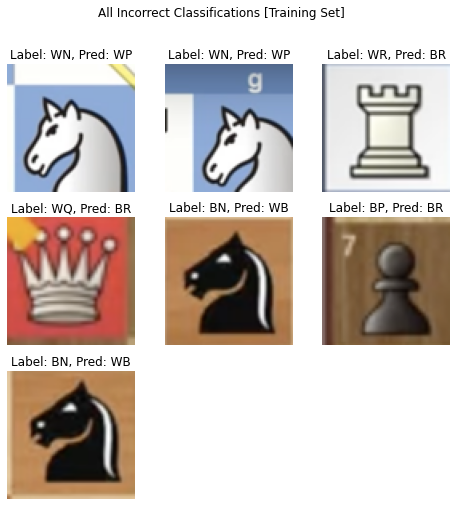

In [19]:
IMG_FORMATS = ['png', 'jpg', 'jpeg']
train_data_files =  [_ for _ in os.listdir(source_train) if _.split('.')[-1] in IMG_FORMATS]

train_err_data = []
err_files = []
for _i, (_l, _p) in enumerate(zip(train_label_ind, train_pred_ind)):
    if _l != _p:
        train_err_data.append(_i)
        err_files.append(train_data_files[_i])

col_ct = 3
for _i, _fi in enumerate(train_err_data):
    plt.subplot(len(train_err_data)//col_ct+1, col_ct, _i+1)
    plt.imshow(Image.open('/'.join([source_train, train_data_files[_fi]])))
    plt.gca().set_axis_off()
    plt.gca().set_title('Label: {0}, Pred: {1}'.format(label_dict[train_label_ind[_fi]], label_dict[train_pred_ind[_fi]]))
plt.gcf().set_size_inches(8,8)
plt.suptitle('All Incorrect Classifications [Training Set]') 
plt.show()

<h3>Validation Results</h3>

Let's use the model to recreate the results for the validation set and analyze them.

In [20]:
validation_model = Piece_Classification(model_dir, model_weight_fname)

source_valid = 'data/raw/squares/validation'
labels_csv_full_path = 'data/model/sq_labels.csv'
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
fname_col = 'fname'
label_cols = ['PcColor-BWE', 'PcType-PRNBQKE']
square_size = 80   
image_size = [square_size, square_size]


(_, y_valid) = validation_model.make_X_y(source_valid, labels_csv_full_path, fname_col, label_cols, label_dict_csv_full_path,image_size)
y_valid_pred = validation_model.predict(source_valid, image_size)

All image Count:5696
Data Dir Count:1128
Final Count to Process:1128
Prediction Image Count:1128


2021-12-17 22:07:11.534985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [21]:
label_dict_csv_full_path = 'data/model/piece-train/chess_dict_all_EBW.csv'
label_dict = list(pd.read_csv(label_dict_csv_full_path, header=None).iloc[:,0])

valid_label_ind = y_valid.argmax(axis=1)
valid_pred_ind = y_valid_pred.argmax(axis=1)
valid_confusion = tf.math.confusion_matrix(y_valid.argmax(axis=1), y_valid_pred.argmax(axis=1))
valid_confusion_df = pd.DataFrame(data=valid_confusion.numpy().T, columns = label_dict, index = [_+'_pred' for _ in label_dict])
valid_confusion_df

,EE,WP,WR,WN,WB,WQ,WK,BP,BR,BN,BB,BQ,BK
EE_pred,705,1,0,0,0,0,0,0,0,0,0,0,0
WP_pred,0,111,1,0,0,0,0,1,0,0,0,0,0
WR_pred,1,0,28,0,0,1,0,0,0,0,0,0,0
WN_pred,0,0,0,26,0,0,0,0,0,0,0,0,0
WB_pred,0,0,0,0,20,0,0,0,0,0,0,0,0
WQ_pred,0,0,0,0,0,10,0,0,0,0,0,0,0
WK_pred,0,0,0,0,0,0,14,0,0,0,0,0,1
BP_pred,0,0,0,0,0,0,0,104,1,0,0,0,0
BR_pred,1,0,0,0,0,0,0,0,26,0,0,0,0
BN_pred,0,1,0,0,0,0,0,0,0,22,0,0,0


<li>Recall errors seem to be highest for Black King only - recall rate is highest as well - at 10%.
<li>Now, let's see the images. 

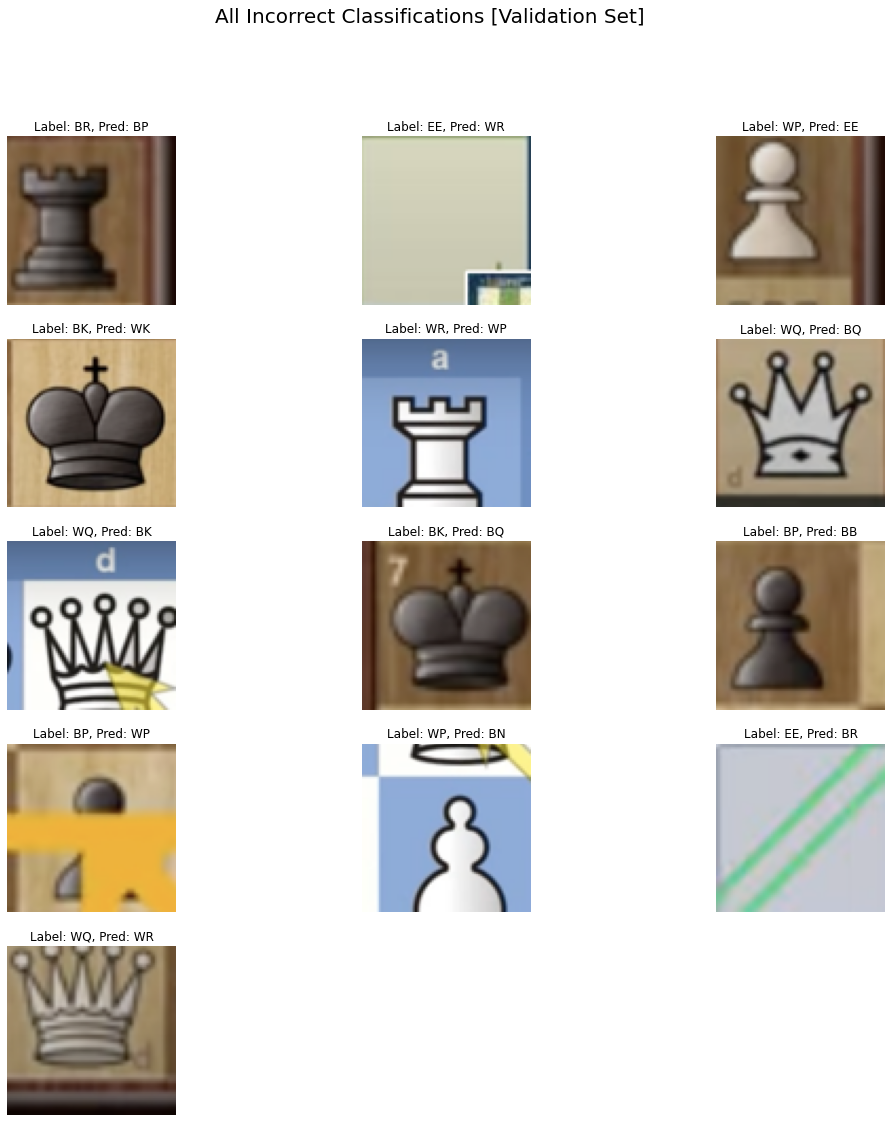

In [23]:
IMG_FORMATS = ['png', 'jpg', 'jpeg']
valid_data_files =  [_ for _ in os.listdir(source_valid) if _.split('.')[-1] in IMG_FORMATS]

valid_err_data = []
err_files = []
for _i, (_l, _p) in enumerate(zip(valid_label_ind, valid_pred_ind)):
    if _l != _p:
        valid_err_data.append(_i)
        err_files.append(valid_data_files[_i])

col_ct = 3
for _i, _fi in enumerate(valid_err_data):
    plt.subplot(len(valid_err_data)//col_ct+1, col_ct, _i+1)
    plt.imshow(Image.open('/'.join([source_valid, valid_data_files[_fi]])))
    plt.gca().set_axis_off()
    plt.gca().set_title('Label: {0}, Pred: {1}'.format(label_dict[valid_label_ind[_fi]], label_dict[valid_pred_ind[_fi]]))
plt.gcf().set_size_inches(18,18)
plt.suptitle('All Incorrect Classifications [Validation Set]', fontsize=20) 
plt.show()

<li> In addition to the above notes, anecdotally, proper square extraction also seems to play an important role for prediction, especially for the blue chess set.
<li> A larger dataset, or perhaps some augmentation, could solve the problems here but I will not attempt it at this stage.